# Case study 1 – Predicting stock prices based on social media

In [1]:
# Text-sentiment Analysis
## -1: negative; 0: neutral; 1: positive
from textblob import TextBlob
# use the textblob module to make a function called "stringToSentiment" that returns a sentences sentiment 
def stringToSentiment(text): 
    return TextBlob(text).sentiment.polarity

print(stringToSentiment('i hate you'))
print(stringToSentiment('You are the best'))
print(stringToSentiment('i see you'))

-0.8
1.0
0.0


In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np
tweets = pd.read_csv(r'C:\Users\cml_p\Python\Learning\DLs\Principles-of-Data-Science-Second-Edition-master\Chapter13\so_many_tweets.csv')
tweets.head()

,Text,Date,Status,Retweet
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN
3,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17


## Exploratory Data Analysis
The above columns are explained by the following:
* Text: Unstructured text at the nominal level
* Date: Datetime (we will think of datetime in a continuous way)
* Status: Status unique ID at the nominal level
* Retweet: Status ID of tweet showing that this tweet was a retweet at the nominal level

In [3]:
print(f'Details on "tweets" is as follows: \nColumns:{tweets.shape[1]:5} \nRows:{tweets.shape[0]:>10} \
\n\nWith the following columns and types:\n{tweets.dtypes}')

Details on "tweets" is as follows: 
Columns:    4 
Rows:     52512 

With the following columns and types:
Text        object
Date        object
Status       int64
Retweet    float64
dtype: object


In [4]:
# create a new column in tweets called sentiment that maps stringToSentiment to the text column 
tweets['sentiment'] = tweets['Text'].apply(stringToSentiment)
tweets.head()

,Text,Date,Status,Retweet,sentiment
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
3,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


* We will resample this dataset in order to get a sense of the average sentiment of the stock on Twitter every day.
* We will do this in three steps:
  1. We will ensure that the Date column is of the Python datetime type.
  2. We will replace our DataFrame's index with the datetime column (which allows us to use complex datetime functions).
  3. We will resample the data so that each row, instead of representing a tweet, will represent a single day with an aggregated sentiment score for each day:

In [5]:
len(tweets)

52512

In [6]:
tweets.index = pd.RangeIndex(start=0, stop=len(tweets), step=1)  
# As a list, we can splice it 
list(tweets.index)[:5] 

[0, 1, 2, 3, 4]

In [7]:
# cast the date column as a datetime 
tweets['Date'] = pd.to_datetime(tweets.Date) 
tweets['Date'].head() 

0   2015-05-24 03:46:08
1   2015-05-24 04:17:42
2   2015-05-24 04:13:22
3   2015-05-24 04:08:34
4   2015-05-24 04:04:42
Name: Date, dtype: datetime64[ns]

In [8]:
#### making the Date column the index
tweets.index = tweets.Date 
print(tweets.index[:5])
tweets.head()

DatetimeIndex(['2015-05-24 03:46:08', '2015-05-24 04:17:42',
               '2015-05-24 04:13:22', '2015-05-24 04:08:34',
               '2015-05-24 04:04:42'],
              dtype='datetime64[ns]', name='Date', freq=None)


,Text,Date,Status,Retweet,sentiment
Date,,,,,
2015-05-24 03:46:08,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
2015-05-24 04:17:42,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2015-05-24 04:13:22,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
2015-05-24 04:08:34,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
2015-05-24 04:04:42,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


In [9]:
# create a dataframe called daily_tweets which resamples tweets by D, averaging the columns 
daily_tweets = tweets[['sentiment']].resample('D').mean()
# I only want the sentiment column in my new Dataframe. 
daily_tweets.head()

,sentiment
Date,
2015-05-02,0.083031
2015-05-03,0.107045
2015-05-04,0.084062
2015-05-05,0.063895
2015-05-06,0.067004


In [10]:
daily_tweets.shape
#we have 23 days worth of data

(23, 1)

<Axes: xlabel='Date'>

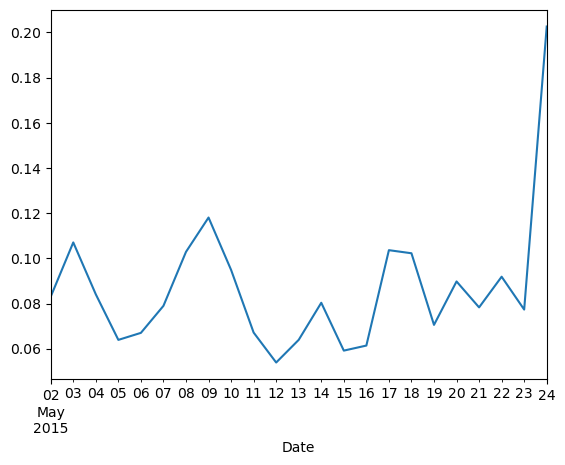

In [11]:
# tracking sentiment over the days
# plot the sentiment as a line graph 
daily_tweets.sentiment.plot(kind='line') 

In [110]:
#utilizing pandas_datareader to grab stock data
from pandas_datareader import data as pdr
import datetime 
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

start_date = datetime.date(2015, 5, 2).strftime('%Y-%m-%d')
end_date =datetime.date(2015, 5, 25).strftime('%Y-%m-%d')

In [111]:
historical_prices = pdr.get_data_yahoo('AAPL', start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [112]:
prices = pd.DataFrame(historical_prices) 
prices.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-04,32.375000,32.642502,32.064999,32.174999,28.877987,203953200
2015-05-05,32.037498,32.112499,31.445000,31.450001,28.227276,197085600
2015-05-06,31.639999,31.687500,30.840000,31.252501,28.050020,288564000
2015-05-07,31.192499,31.520000,31.004999,31.315001,28.223515,175763600
2015-05-08,31.670000,31.905001,31.527500,31.905001,28.755270,222201600


In [27]:
prices.info() #check that these are all numbers

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2015-05-04 to 2015-05-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15 non-null     float64
 1   High       15 non-null     float64
 2   Low        15 non-null     float64
 3   Close      15 non-null     float64
 4   Adj Close  15 non-null     float64
 5   Volume     15 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 840.0 bytes


,Volume,Close
count,1.500000e+01,15.000000
mean,1.859976e+08,32.042667
std,3.666822e+07,0.596598
min,1.387768e+08,31.252501
25%,1.635324e+08,31.485001
50%,1.808140e+08,32.174999
75%,2.003086e+08,32.516251
max,2.885640e+08,33.134998


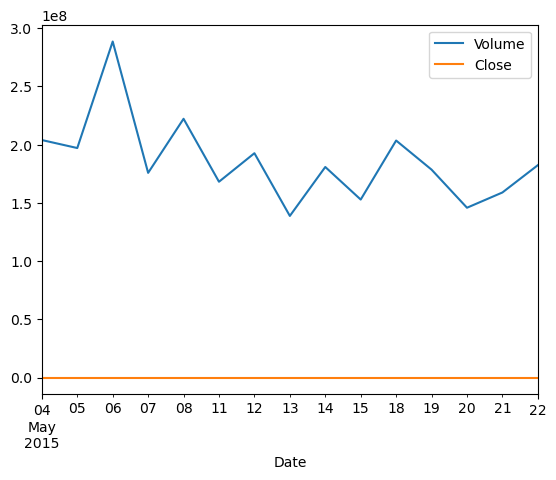

In [29]:
# plot both volume and close as line graphs in the same graph, what do you notice is the problem? 
prices[["Volume", 'Close']].plot()
prices[["Volume", 'Close']].describe()

<Axes: >

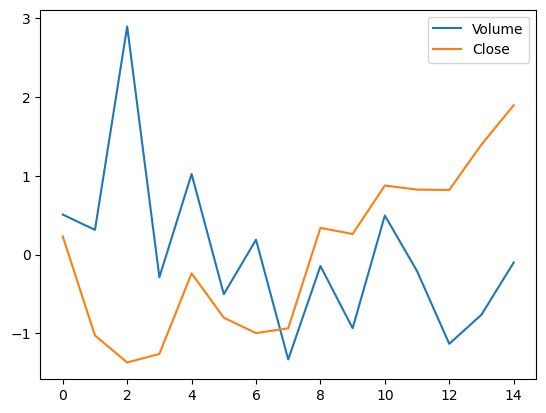

In [30]:
#they are on different scales!. Let's resolve that
from sklearn.preprocessing import StandardScaler
# scale the columns by z scores using StandardScaler 
# Then plot the scaled data 
s = StandardScaler() 
only_prices_and_volumes = prices[["Volume", 'Close']] 
price_volume_scaled = s.fit_transform(only_prices_and_volumes) 
pd.DataFrame(price_volume_scaled, columns=["Volume", 'Close']).plot() 

In [31]:
# concatinate prices.Close, and daily_tweets.sentiment 
 
merged = pd.concat([prices.Close, daily_tweets.sentiment], axis=1) 
merged.head() 
## we see some NaN values. Checking the calendar we see that these are weekends
### given that we want to predoct the next trading day, let's drop NaN values

,Close,sentiment
Date,,
2015-05-02,NaN,0.083031
2015-05-03,NaN,0.107045
2015-05-04,32.174999,0.084062
2015-05-05,31.450001,0.063895
2015-05-06,31.252501,0.067004


<Axes: xlabel='Date'>

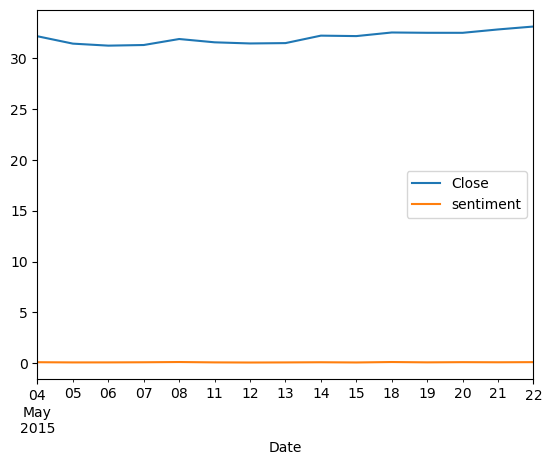

In [33]:
# Delete any rows with missing values in any column 
merged.dropna(inplace=True)
merged.plot()

<Axes: >

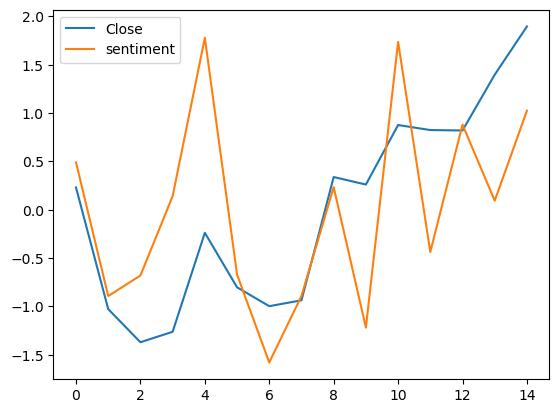

In [34]:
# We need to scale again
# scale the columns by z scores using StandardScaler 
from sklearn.preprocessing import StandardScaler 
s = StandardScaler() 
merged_scaled = s.fit_transform(merged) 
 
pd.DataFrame(merged_scaled, columns=merged.columns).plot() 
# notice how sentiment seems to follow the closing price 

* We will attempt to apply a supervised learning model to this
    * Recall that our response is the value that we wish to predict, and our features are values that we will use to predict the response.
* So, for each row, our response should be today's closing price, while our feature should be yesterday's sentiment of the stock. To do this, I will use a built-in function in Pandas called shift to shift our sentiment column one item backward:

In [35]:
# Shift the sentiment column backwards one item 
 
merged['yesterday_sentiment'] = merged['sentiment'].shift(1) 
merged.head()

,Close,sentiment,yesterday_sentiment
Date,,,
2015-05-04,32.174999,0.084062,NaN
2015-05-05,31.450001,0.063895,0.084062
2015-05-06,31.252501,0.067004,0.063895
2015-05-07,31.315001,0.078972,0.067004
2015-05-08,31.905001,0.102869,0.078972


* If you merely wish to associate sentiment with a movement in price, then I recommend using the classification route. If you wish to associate sentiment with the amount of movement, I recommend a regression

### Regression route


In [36]:
#drop the single N/A column that we don't have a predictor for
regression_df = merged[['yesterday_sentiment', 'Close']] 
regression_df.dropna(inplace=True) 
regression_df.head() 

C:\Users\cml_p\AppData\Local\Temp\ipykernel_19224\1363309077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df.dropna(inplace=True)


,yesterday_sentiment,Close
Date,,
2015-05-05,0.084062,31.450001
2015-05-06,0.063895,31.252501
2015-05-07,0.067004,31.315001
2015-05-08,0.078972,31.905001
2015-05-11,0.102869,31.580000


In [39]:
#Let's use both a random forest and a linear regression and see which performs better, using root-mean-square error (RMSE) as our metric:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score

# Our RMSE as a result of cross validation linear regression 
linreg = LinearRegression() 
rmse_cv = np.sqrt(abs(cross_val_score(linreg, regression_df[['yesterday_sentiment']], regression_df['Close'], cv=3, scoring='neg_mean_squared_error').mean())) 
print(rmse_cv) 

# Our RMSE as a result of cross validation random forest 
rf = RandomForestRegressor() 
rmse_cv = np.sqrt(abs(cross_val_score(rf, regression_df[['yesterday_sentiment']], regression_df['Close'], cv=3, scoring='neg_mean_squared_error').mean())) 
print(rmse_cv) 

0.8765180345824453
0.8854759953619113


* Look at our RMSE; it's about 0.88 for both models, meaning that on average, our model is off by about 88 cents  , which is actually a big deal considering our stock price likely doesn't move that much:

In [40]:
regression_df['Close'].describe()

count    14.000000
mean     32.033215
std       0.617953
min      31.252501
25%      31.476251
50%      32.048751
75%      32.516876
max      33.134998
Name: Close, dtype: float64

* Test the validity of our model against the null model

In [41]:
# null model for regression 
mean_close = regression_df['Close'].mean() 
preds = [mean_close]*regression_df.shape[0] 
preds 
from sklearn.metrics import mean_squared_error 
null_rmse = np.sqrt(mean_squared_error(preds, regression_df['Close'])) 
null_rmse 

0.595473959497161

* We didn't beat the null model so regression might not be the best choice 

### Using Classification
* For classification, we have a bit more work to do because we don't have a categorical response yet. To make one, we need to transform the closing column into some categorical option. I will choose to make the following response. I will make a new column called *change_close_big_deal*, defined as follows:
    * So, our response will be 1 if our response changed significantly, and 0 if the change in stock was negligible:

In [42]:
# Imports for our classification 
 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 
# Make a new dataframe for our classification and drop the null values 
 
classification_df = merged[['yesterday_sentiment', 'Close']] 
 
# variable to represent yesterday's closing price 
classification_df['yesterday_close'] = classification_df['Close'].shift(1) 
 
# column that represents the precent change in price since yesterday 
classification_df['percent_change_in_price'] = (classification_df['Close']-classification_df['yesterday_close']) / classification_df['yesterday_close'] 
 
# drop any null values 
classification_df.dropna(inplace=True) 
classification_df.head() 

,yesterday_sentiment,Close,yesterday_close,percent_change_in_price
Date,,,,
2015-05-05,0.084062,31.450001,32.174999,-0.022533
2015-05-06,0.063895,31.252501,31.450001,-0.006280
2015-05-07,0.067004,31.315001,31.252501,0.002000
2015-05-08,0.078972,31.905001,31.315001,0.018841
2015-05-11,0.102869,31.580000,31.905001,-0.010187


In [43]:
# Our new classification response  
classification_df['change_close_big_deal'] = abs(classification_df['percent_change_in_price'] ) > .01 
classification_df.head() 

,yesterday_sentiment,Close,yesterday_close,percent_change_in_price,change_close_big_deal
Date,,,,,
2015-05-05,0.084062,31.450001,32.174999,-0.022533,True
2015-05-06,0.063895,31.252501,31.450001,-0.006280,False
2015-05-07,0.067004,31.315001,31.252501,0.002000,False
2015-05-08,0.078972,31.905001,31.315001,0.018841,True
2015-05-11,0.102869,31.580000,31.905001,-0.010187,True


* Let's now perform the same cross-validation as we did with our regression, but this time, we will be using the accuracy feature of our cross-validation module and, instead of a regression module, we will be using two classification machine learning algorithms:

In [46]:
# Our accuracy as a result of cross validation random forest 
 
rf = RandomForestClassifier() 
accuracy_cv = cross_val_score(rf, classification_df[['yesterday_sentiment']], classification_df['change_close_big_deal'], cv=3, scoring='accuracy').mean() 
 
accuracy_cv 
# not so good

0.2333333333333333

In [47]:
# Our accuracy as a result of cross validation logistic regression 
 
logreg = LogisticRegression() 
accuracy_cv = cross_val_score(logreg, classification_df[['yesterday_sentiment']], classification_df['change_close_big_deal'], cv=3, scoring='accuracy').mean() 
 
accuracy_cv
# an improvement, but let's check against the null model

0.5666666666666667

In [71]:
# double-checking how the null is determined
classification_df.loc[(classification_df['change_close_big_deal']==True)].count()

yesterday_sentiment        6
Close                      6
yesterday_close            6
percent_change_in_price    6
change_close_big_deal      6
dtype: int64

In [48]:
# null model for classification 
null_accuracy = 1 - classification_df['change_close_big_deal'].mean() 
 
null_accuracy 
# it appears that our model is 1% less valid than a random guess

0.5714285714285714

#### Consider using ARIMA as it is much more robust